[View in Colaboratory](https://colab.research.google.com/github/findingfoot/ML_practice-codes/blob/master/Cholesky_Decomposition.ipynb)

This script will use TensorFlow's function, tf.cholesky() to decompose our design matrix and solve for the parameter matrix from linear regression.

For linear regression we are given the system $A \cdot x = y$. Here, $A$ is our design matrix, $x$ is our parameter matrix (of interest), and $y$ is our target matrix (dependent values).

For a Cholesky decomposition to work we assume that $A$ can be broken up into a product of a lower triangular matrix, $L$ and the transpose of the same matrix, $L^{T}$.

Note that this is when $A$ is square. Of course, with an over determined system, $A$ is not square. So we factor the product $A^{T} \cdot A$ instead. We then assume:

$$A^{T} \cdot A = L^{T} \cdot L$$
For more information on the Cholesky decomposition and it's uses, see the following wikipedia link: The Cholesky Decomposition

Given that $A$ has a unique Cholesky decomposition, we can write our linear regression system as the following:

$$ L^{T} \cdot L \cdot x = A^{T} \cdot y $$
Then we break apart the system as follows:

$$L^{T} \cdot z = A^{T} \cdot y$$
and

$$L \cdot x = z$$
The steps we will take to solve for $x$ are the following

Compute the Cholesky decomposition of $A$, where $A^{T} \cdot A = L^{T} \cdot L$.

Solve ($L^{T} \cdot z = A^{T} \cdot y$) for $z$.

Finally, solve ($L \cdot x = z$) for $x$.


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()

sess = tf.Session()

In [0]:
#Creating data

x_vals = np.linspace(0,10, 100)
y_vals = x_vals + np.random.normal(0, 1, 100)

In [0]:
#creating design matrix A

x_vals_column = np.transpose(np.matrix(x_vals))
ones_column = np.transpose(np.matrix(np.repeat(1, 100)))
A = np.column_stack((x_vals_column, ones_column))


In [0]:
# create a y matrix

y = np.transpose(np.matrix(y_vals))

# create tensors

A_tensor = tf.constant(A)
y_tensor = tf.constant(y)

In [0]:
at = tf.matmul(tf.transpose(A_tensor), A_tensor)
L = tf.cholesky(at)

In [0]:
aty = tf.matmul(tf.transpose(A_tensor), y)
answer1 = tf.matrix_solve(L, aty)

In [0]:
answer2 = tf.matrix_solve(tf.transpose(L), answer1)

final_answer = sess.run(answer2)

In [10]:
final_answer.shape

(2, 1)

In [11]:
slope = final_answer[0][0]

print('slope :', slope)
intercept = final_answer[1][0]

print('intercept : ', intercept)

best_fit = []

for i in x_vals:
    best_fit.append(slope*i+intercept)
    

slope : 1.059099328208515
intercept :  -0.2274663633709576


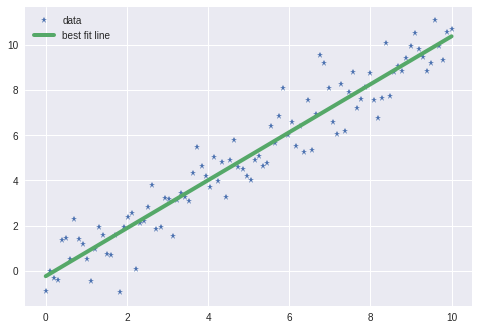

In [12]:
plt.plot(x_vals, y_vals, '*', label = 'data')
plt.plot(x_vals, best_fit, '-', label = 'best fit line', linewidth = 4)
plt.legend(loc = 'best')
plt.show()